In [1]:
import pandas as pd

#import pandas to read the data

# **Reading the data**

In [2]:
df=pd.read_csv('/content/musk_csv.csv')

#read the data

In [3]:
import matplotlib.pyplot as plt

#import library for visuisation


In [4]:
df.head(2)

#show top two submissions of the project

,ID,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,...,f128,f129,f130,f131,f132,f133,f134,f135,f136,f137,f138,f139,f140,f141,f142,f143,f144,f145,f146,f147,f148,f149,f150,f151,f152,f153,f154,f155,f156,f157,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
0,1,MUSK-211,211_1+1,46,-108,-60,-69,-117,49,38,-161,-8,5,-323,-220,-113,-299,-283,-307,-31,-106,-227,-42,-59,-22,-67,189,81,17,-27,-89,-67,105,-116,124,-106,5,-120,63,-165,...,81,-114,-187,45,-118,-75,-182,-234,-19,12,-13,-41,-119,-149,70,17,-20,-177,-101,-116,-14,-50,24,-81,-125,-114,-44,128,3,-244,-308,52,-7,39,126,156,-50,-112,96,1
1,2,MUSK-211,211_1+10,41,-188,-145,22,-117,-6,57,-171,-39,-100,-319,-111,-228,-281,-281,-300,54,-149,-98,-196,-27,-22,2,75,49,-34,45,-91,32,95,-116,85,-23,42,-58,61,-171,...,88,-21,-32,32,-128,-72,-124,-218,-94,53,-79,-20,-35,-26,4,50,17,-177,-102,-121,-66,-77,51,-41,-34,-32,-63,115,-5,-235,-59,-2,52,103,136,169,-61,-136,79,1


In [5]:
len(df.columns)
#length of the columns

170

In [6]:
df['class'].unique()
#unique classes

array([1, 0])

# **store independent variable and target variables**

In [7]:
features = df.iloc[:, 3:169]
labels = df.iloc[:, -1]

#store the data in the fetures and lables

In [8]:
features.head(2)

#show top 2 variables

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,...,f127,f128,f129,f130,f131,f132,f133,f134,f135,f136,f137,f138,f139,f140,f141,f142,f143,f144,f145,f146,f147,f148,f149,f150,f151,f152,f153,f154,f155,f156,f157,f158,f159,f160,f161,f162,f163,f164,f165,f166
0,46,-108,-60,-69,-117,49,38,-161,-8,5,-323,-220,-113,-299,-283,-307,-31,-106,-227,-42,-59,-22,-67,189,81,17,-27,-89,-67,105,-116,124,-106,5,-120,63,-165,40,-27,68,...,-27,81,-114,-187,45,-118,-75,-182,-234,-19,12,-13,-41,-119,-149,70,17,-20,-177,-101,-116,-14,-50,24,-81,-125,-114,-44,128,3,-244,-308,52,-7,39,126,156,-50,-112,96
1,41,-188,-145,22,-117,-6,57,-171,-39,-100,-319,-111,-228,-281,-281,-300,54,-149,-98,-196,-27,-22,2,75,49,-34,45,-91,32,95,-116,85,-23,42,-58,61,-171,2,-144,38,...,17,88,-21,-32,32,-128,-72,-124,-218,-94,53,-79,-20,-35,-26,4,50,17,-177,-102,-121,-66,-77,51,-41,-34,-32,-63,115,-5,-235,-59,-2,52,103,136,169,-61,-136,79


In [9]:
labels.head(2)

#lables data 

0    1
1    1
Name: class, dtype: int64

In [10]:
features.shape
#shape of the data

(6598, 166)

In [11]:
labels.shape

#shape of the class data

(6598,)

# **Train test split using train data and predicting results**

In [57]:
from sklearn.model_selection import train_test_split
#import library for train test and split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=1)

#split the data


In [58]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

#again split the data


# **Data pre-processing using standard scaler**

# machine learning works on the magnitude of data so transform the data

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
#data pre process

# **import keras package**

In [59]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

In [60]:
classifier = Sequential()

#store the algo in new variable

In [61]:
#adding the first hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 166))

In [62]:
# Adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'mse', metrics = ['accuracy'])

In [63]:
classifier.summary()

#model summary



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 6)                 1002      
_________________________________________________________________
dense_6 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 7         
Total params: 1,051
Trainable params: 1,051
Non-trainable params: 0
_________________________________________________________________


# **fitting the model and predicting the results**

In [64]:
history = classifier.fit(X_train, y_train, epochs=10, batch_size=1, validation_data=(X_val, y_val))

#fitting the model

Epoch 1/10
4222/4222 [==============================] - 5s 1ms/step - loss: 0.0971 - accuracy: 0.8797 - val_loss: 0.0781 - val_accuracy: 0.8883
Epoch 2/10
4222/4222 [==============================] - 5s 1ms/step - loss: 0.0665 - accuracy: 0.9225 - val_loss: 0.0738 - val_accuracy: 0.9025
Epoch 3/10
4222/4222 [==============================] - 5s 1ms/step - loss: 0.0623 - accuracy: 0.9278 - val_loss: 0.0664 - val_accuracy: 0.9110
Epoch 4/10
4222/4222 [==============================] - 5s 1ms/step - loss: 0.0598 - accuracy: 0.9261 - val_loss: 0.0568 - val_accuracy: 0.9233
Epoch 5/10
4222/4222 [==============================] - 5s 1ms/step - loss: 0.0570 - accuracy: 0.9306 - val_loss: 0.0555 - val_accuracy: 0.9328
Epoch 6/10
4222/4222 [==============================] - 5s 1ms/step - loss: 0.0554 - accuracy: 0.9330 - val_loss: 0.0569 - val_accuracy: 0.9261
Epoch 7/10
4222/4222 [==============================] - 5s 1ms/step - loss: 0.0537 - accuracy: 0.9379 - val_loss: 0.0596 - val_accuracy:

In [84]:
y_train.shape

#shape of the data

(4222,)

In [85]:
X_val.shape

(1056, 166)

# **model accuracy**

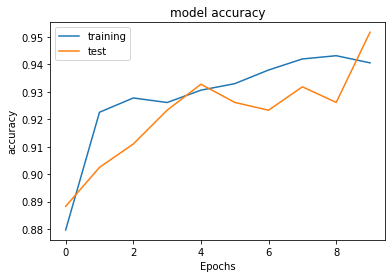

In [77]:
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
plt.plot(loss_train,label='training')
plt.plot(loss_val,label='test')
plt.title('model accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()



# **model loss**

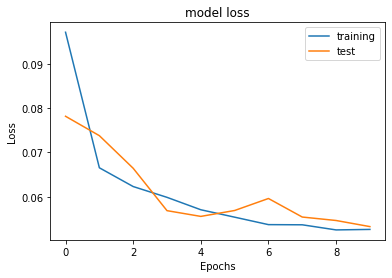

In [78]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
plt.plot(loss_train,label='training')
plt.plot(loss_val,label='test')
plt.title('model loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [47]:
labels_pred = classifier.predict_classes(features_test)
#labels_pred = (labels_pred > 0.5)

# **predict the results**

In [94]:
oup=classifier.predict_classes(X_val)

#predict the values

In [95]:
oup.shape

#shape of the output data

(1056, 1)

In [101]:
oup

#values

array([[0],
       [1],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int32)

# **validation metrics**

In [98]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_val,oup)

#confusion matrix

In [99]:
cm

array([[891,  14],
       [ 37, 114]])

# **Classification Report**

In [52]:
from sklearn.metrics import classification_report
#import the library

In [96]:
print(classification_report(y_val,oup))

#accuracy

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       905
           1       0.89      0.75      0.82       151

    accuracy                           0.95      1056
   macro avg       0.93      0.87      0.89      1056
weighted avg       0.95      0.95      0.95      1056



# **over all loss and accuracy**

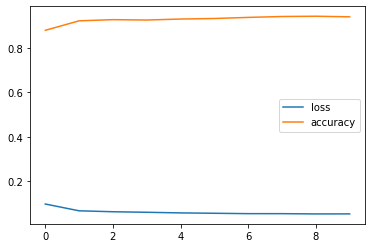

In [100]:
plt.plot(history.history['loss'],label="loss")
plt.plot(history.history['accuracy'],label="accuracy")
plt.legend()